In [1]:
import numpy as np
import os
import datetime
import xarray as xr

In [2]:
# expt_name = 'DAv7_M36_ASCAT_type_13_no_catdef_fp', 'DAv7_M36_ASCAT_type_2_fp_precip', 'DAv7_M36_ASCAT_type_13_test_catdef'
expt_name = 'DAv7_M36_SMAP_type_13_comb_fp_scaled' #'LS_DAv8_M36'

start_date = datetime(2015, 4, 1)
end_date = datetime(2021, 4, 1)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

# filename = f"{start_date_str}_{end_date_str}.npz"

In [3]:
data = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_increments_concat.npz')
sfmc_increment_concat = data['sfmc_increment_concat']
rzmc_increment_concat = data['rzmc_increment_concat']
prmc_increment_concat = data['prmc_increment_concat']

In [ ]:
# Define the thresholds and their corresponding labels
thresholds = [0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045, 0.0005]
labels = [f'Threshold: {threshold}\n Number of surface SM increments' for threshold in thresholds]

# Initialize dictionaries to store results
incremented_values = {}
cnt_sfmc_increment = {}
mean_sfmc_increment = {}
std_sfmc_increment = {}

# Perform calculations for each threshold
for threshold in thresholds:
    key = f'{threshold:.5f}'.split('.')[1].rstrip('0')  # Extract the fractional part and remove trailing zeros
    incremented_values[key] = (sfmc_increment_concat < -threshold) | (sfmc_increment_concat > threshold)
    cnt_sfmc_increment[key] = np.sum(incremented_values[key], axis=0)
    mean_sfmc_increment[key] = np.nanmean(np.where(incremented_values[key], sfmc_increment_concat, np.nan), axis=0)
    std_sfmc_increment[key] = np.nanstd(np.where(incremented_values[key], sfmc_increment_concat, np.nan), axis=0)

# Define the output file name
output_file = f'{expt_name}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_test.npz'

# Remove the existing file if it exists
if os.path.exists(output_file):
    os.remove(output_file)

# Save the data to a file
try:
    np.savez(output_file,
             **{f'incremented_values_{key}': incremented_values[key] for key in incremented_values},
             **{f'cnt_sfmc_increment_{key}': cnt_sfmc_increment[key] for key in cnt_sfmc_increment},
             **{f'mean_sfmc_increment_{key}': mean_sfmc_increment[key] for key in mean_sfmc_increment},
             **{f'std_sfmc_increment_{key}': std_sfmc_increment[key] for key in std_sfmc_increment})
    print(f"Data successfully saved to {output_file}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

In [ ]:
# Define the thresholds and their corresponding labels
thresholds = [0.0, 10.0e-8, 0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045, 0.0005]
labels = [f'Threshold: {threshold}\n Number of surface SM increments' for threshold in thresholds]

# Initialize dictionaries to store results
incremented_values_srfexc = {}
cnt_srfexc_increment = {}
mean_srfexc_increment = {}
std_srfexc_increment = {}

# Perform calculations for each threshold
for threshold in thresholds:
    key = f'{threshold:.5f}'.split('.')[1].rstrip('0')  # Extract the fractional part and remove trailing zeros
    incremented_values_srfexc[key] = (srfexc_incr_concat < -threshold) | (srfexc_incr_concat > threshold)
    cnt_srfexc_increment[key] = np.sum(incremented_values_srfexc[key], axis=0)
    mean_srfexc_increment[key] = np.nanmean(np.where(incremented_values_srfexc[key], srfexc_incr_concat, np.nan), axis=0)
    std_srfexc_increment[key] = np.nanstd(np.where(incremented_values_srfexc[key], srfexc_incr_concat, np.nan), axis=0)

# Define the output file name
output_file_srfexc = f'{expt_name}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_srfexc_test.npz'

# Remove the existing file if it exists
if os.path.exists(output_file_srfexc):
    os.remove(output_file_srfexc)

# Save the data to a file
try:
    np.savez(output_file_srfexc,
             **{f'incremented_values_srfexc_{key}': incremented_values_srfexc[key] for key in incremented_values_srfexc},
             **{f'cnt_srfexc_increment_{key}': cnt_srfexc_increment[key] for key in cnt_srfexc_increment},
             **{f'mean_srfexc_increment_{key}': mean_srfexc_increment[key] for key in mean_srfexc_increment},
             **{f'std_srfexc_increment_{key}': std_srfexc_increment[key] for key in std_srfexc_increment})
    print(f"Data successfully saved to {output_file_srfexc}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

In [30]:
from mapper_functions import plot_global_tight, plot_global_tight_pcm, plot_sa_tight_pcm

ds = xr.open_dataset('DAv7_M36.inst3_1d_lndfcstana_Nt.20150901.nc4')
lon = ds['lon']
lat = ds['lat']
n_tile = len(lat)

Keys in the loaded .npz file: ['incremented_values_00005', 'cnt_sfmc_increment_00005', 'mean_sfmc_increment_00005', 'std_sfmc_increment_00005', 'incremented_values_0001', 'cnt_sfmc_increment_0001', 'mean_sfmc_increment_0001', 'std_sfmc_increment_0001', 'incremented_values_00015', 'cnt_sfmc_increment_00015', 'mean_sfmc_increment_00015', 'std_sfmc_increment_00015', 'incremented_values_0002', 'cnt_sfmc_increment_0002', 'mean_sfmc_increment_0002', 'std_sfmc_increment_0002', 'incremented_values_00025', 'cnt_sfmc_increment_00025', 'mean_sfmc_increment_00025', 'std_sfmc_increment_00025', 'incremented_values_0003', 'cnt_sfmc_increment_0003', 'mean_sfmc_increment_0003', 'std_sfmc_increment_0003', 'incremented_values_00035', 'cnt_sfmc_increment_00035', 'mean_sfmc_increment_00035', 'std_sfmc_increment_00035', 'incremented_values_0004', 'cnt_sfmc_increment_0004', 'mean_sfmc_increment_0004', 'std_sfmc_increment_0004', 'incremented_values_00045', 'cnt_sfmc_increment_00045', 'mean_sfmc_increment_0004

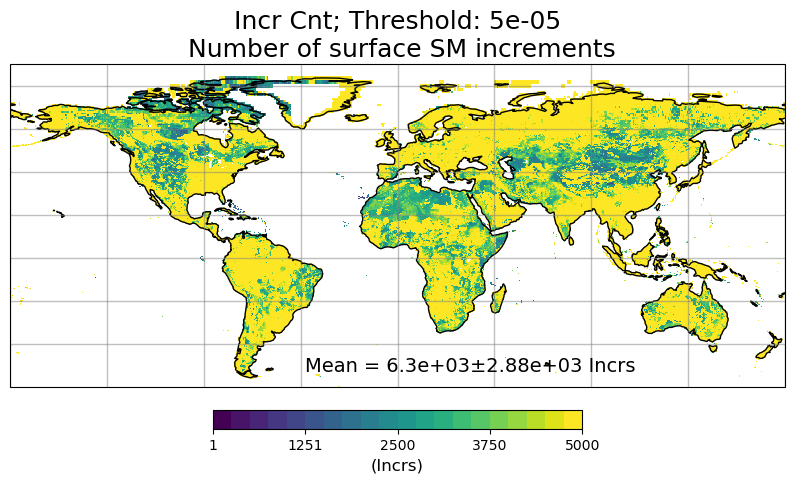

Trying to access key: cnt_sfmc_increment_0001


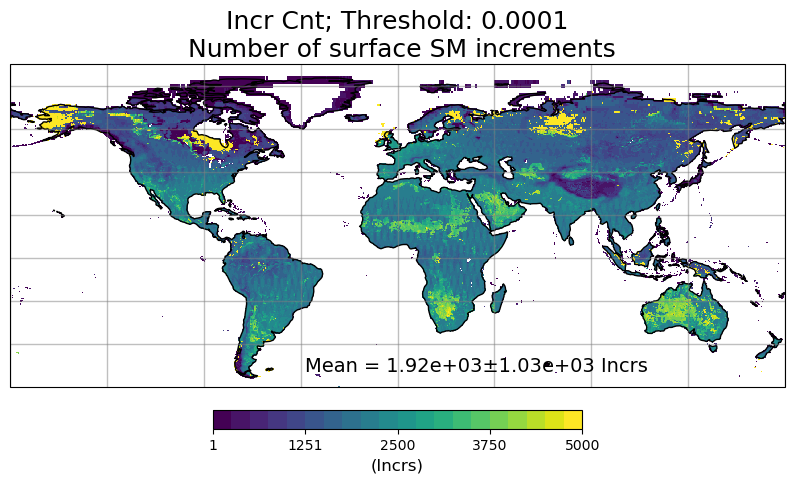

Trying to access key: cnt_sfmc_increment_00015


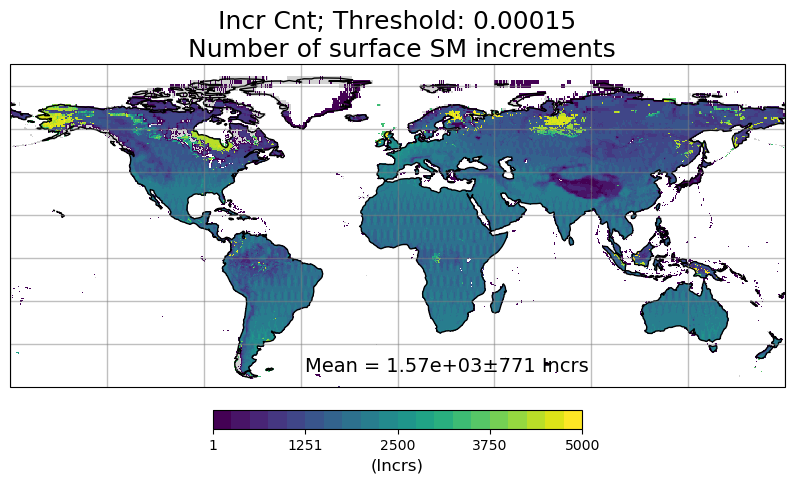

Trying to access key: cnt_sfmc_increment_0002


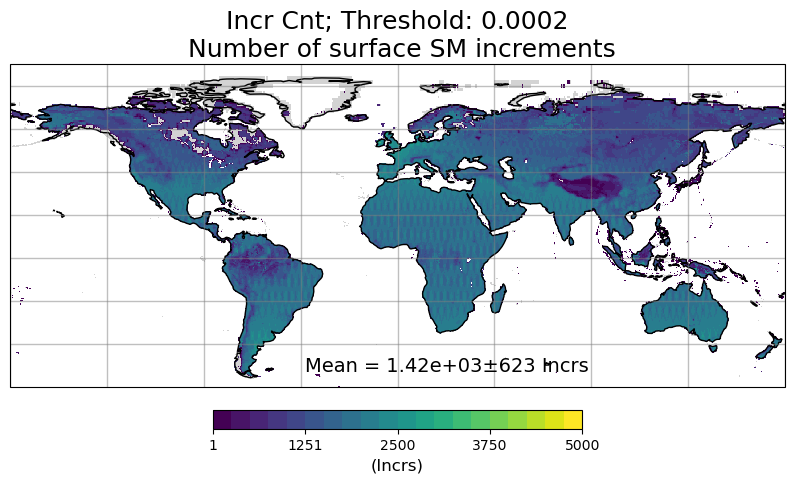

Trying to access key: cnt_sfmc_increment_00025


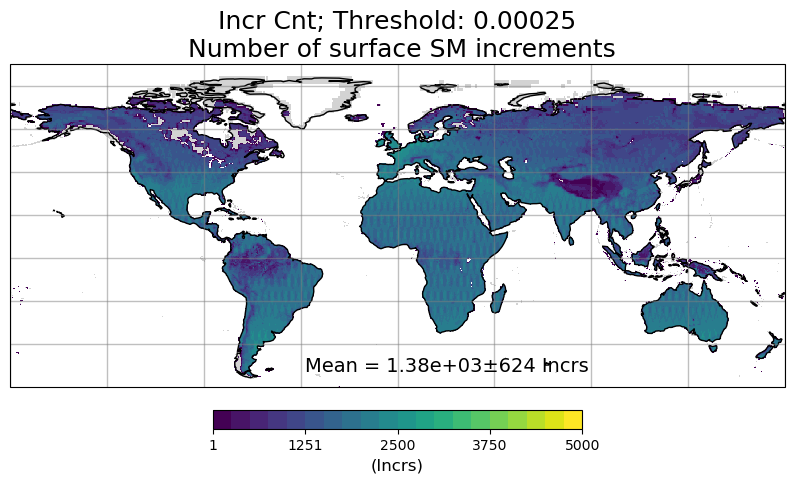

Trying to access key: cnt_sfmc_increment_0003


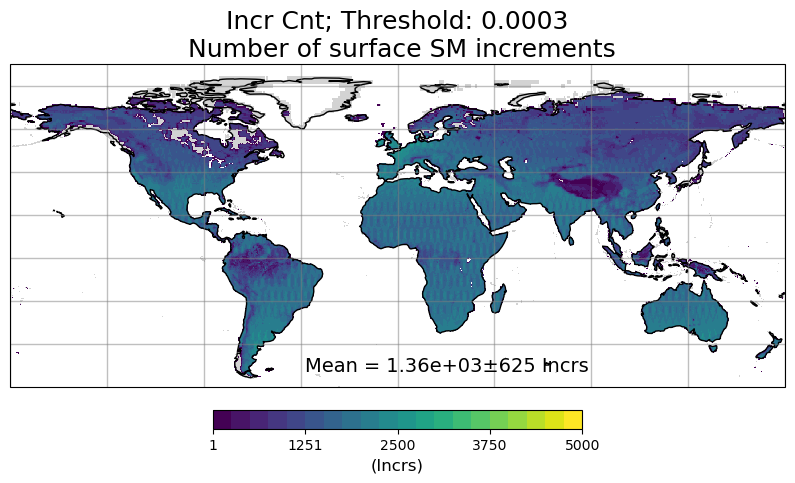

Trying to access key: cnt_sfmc_increment_00035


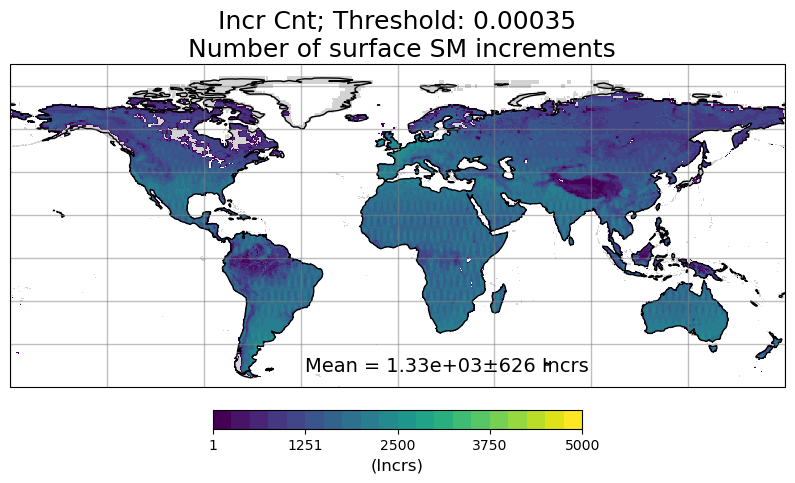

Trying to access key: cnt_sfmc_increment_0004


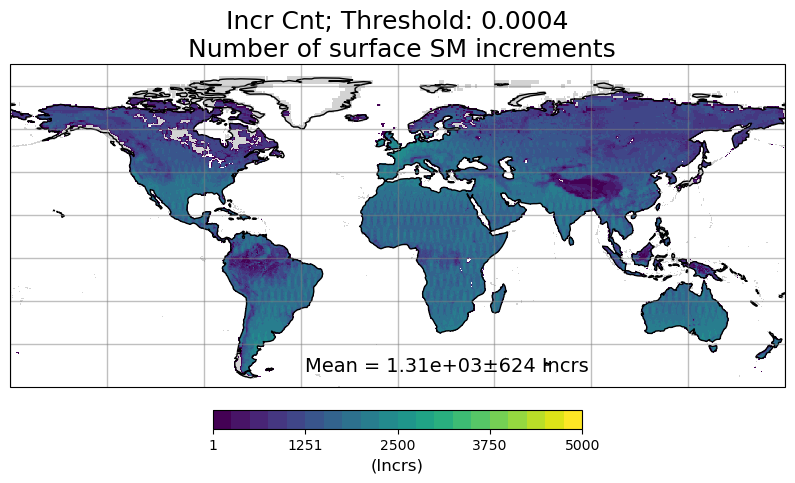

Trying to access key: cnt_sfmc_increment_00045


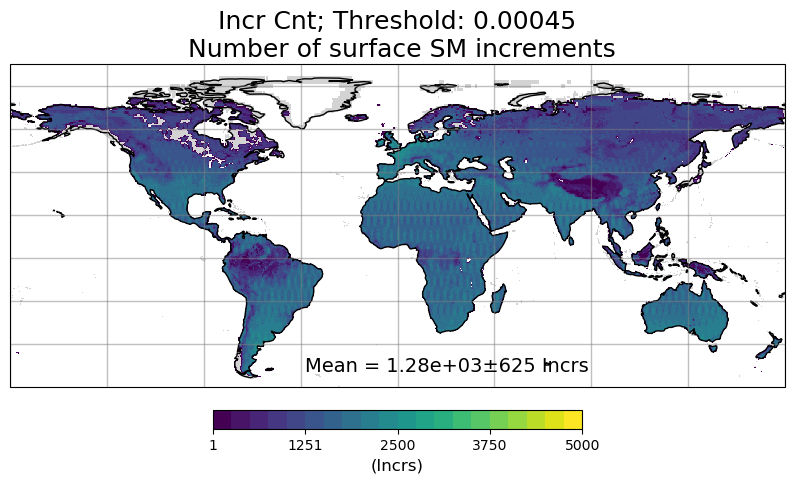

Trying to access key: cnt_sfmc_increment_0005


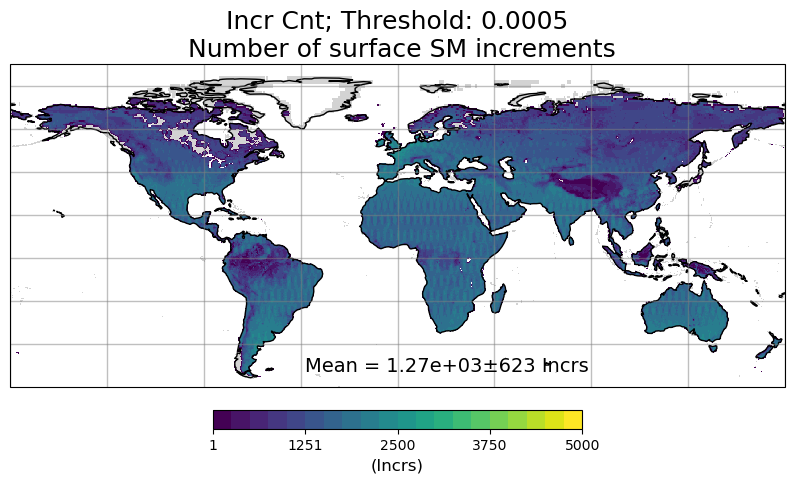

In [42]:
# Define the thresholds and their corresponding labels
thresholds = [0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045, 0.0005]
labels = [f'Threshold: {threshold}\n Number of surface SM increments' for threshold in thresholds]

# Define the output file name
output_file = f'/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/fp_scaled/{expt_name}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_test.npz'

# Load the data from the .npz file
data = np.load(output_file)

# Print the keys in the loaded data for debugging
print("Keys in the loaded .npz file:", data.files)

obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat

# Plotting
for threshold, label in zip(thresholds, labels):
    key = f'{threshold:.5f}'.split('.')[1].rstrip('0')  # Extract the fractional part and remove trailing zeros
    print(f"Trying to access key: cnt_sfmc_increment_{key}")  # Debugging print statement
    obarray[:, 0] = data[f'cnt_sfmc_increment_{key}']  # or any other array you want to plot
    plot_global_tight_pcm(obarray, False, True, f'Incr Cnt; {label}', 'Incrs', 1, 5000)



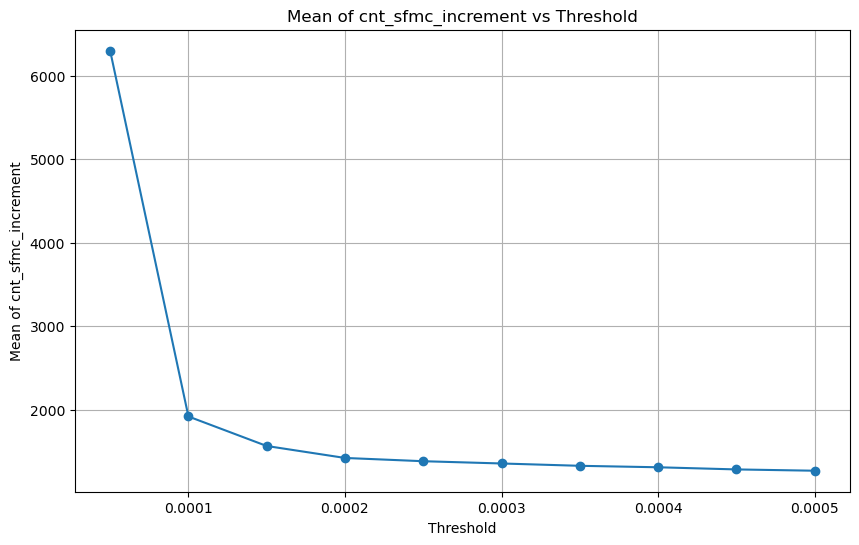

<Figure size 640x480 with 0 Axes>

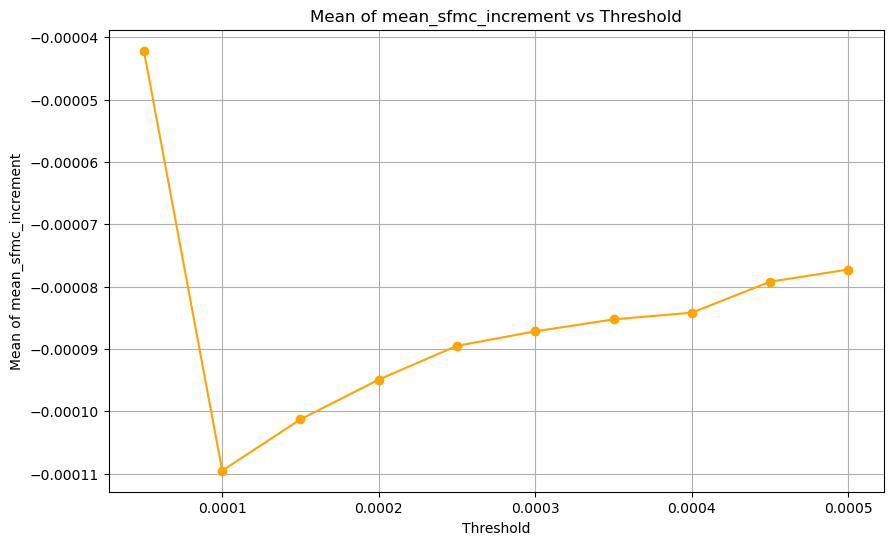

<Figure size 640x480 with 0 Axes>

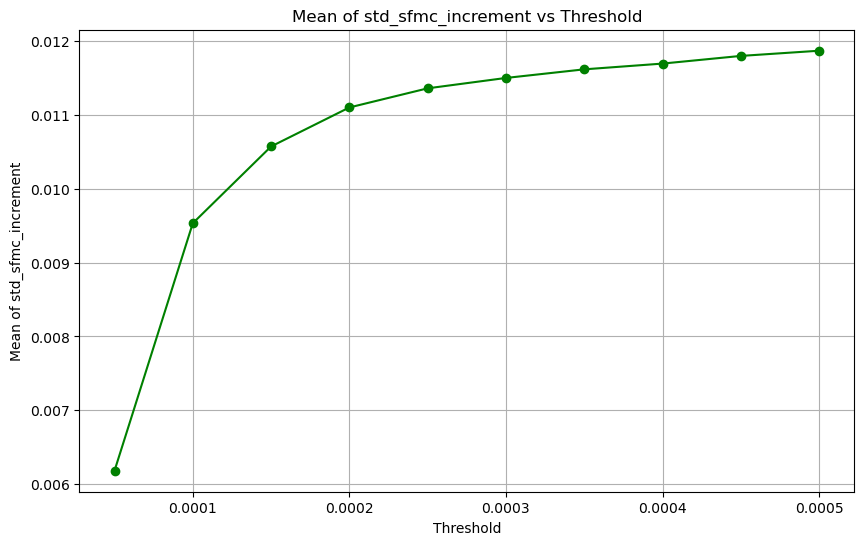

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt

# Calculate the mean of cnt_sfmc_increment for each threshold
mean_cnt_sfmc_increment = [np.nanmean(data[f'cnt_sfmc_increment_{f"{threshold:.5f}".split(".")[1].rstrip("0")}']) for threshold in thresholds]
mean_mean_sfmc_increment = [np.nanmean(data[f'mean_sfmc_increment_{f"{threshold:.5f}".split(".")[1].rstrip("0")}']) for threshold in thresholds]
mean_std_sfmc_increment = [np.nanmean(data[f'std_sfmc_increment_{f"{threshold:.5f}".split(".")[1].rstrip("0")}']) for threshold in thresholds]

# Plot the mean of cnt_sfmc_increment against the threshold values
plt.figure(figsize=(10, 6))
plt.plot(thresholds, mean_cnt_sfmc_increment, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Mean of cnt_sfmc_increment')
plt.title('Mean of cnt_sfmc_increment vs Threshold')
plt.grid(True)
plt.show()
plt.savefig('mean_cnt_sfmc_increment_vs_threshold.png')

# Plot the mean of mean_sfmc_increment against the threshold values
plt.figure(figsize=(10, 6))
plt.plot(thresholds, mean_mean_sfmc_increment, marker='o', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Mean of mean_sfmc_increment')
plt.title('Mean of mean_sfmc_increment vs Threshold')
plt.grid(True)
plt.show()
plt.savefig('mean_mean_sfmc_increment_vs_threshold.png')

# Plot the mean of std_sfmc_increment against the threshold values
plt.figure(figsize=(10, 6))
plt.plot(thresholds, mean_std_sfmc_increment, marker='o', color='green')
plt.xlabel('Threshold')
plt.ylabel('Mean of std_sfmc_increment')
plt.title('Mean of std_sfmc_increment vs Threshold')
plt.grid(True)
plt.show()
plt.savefig('mean_std_sfmc_increment_vs_threshold.png')